In [19]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_parquet('./pokemon_flattened.parquet')
df.shape

(1025, 30)

In [8]:
features = ['height','weight','stat_hp']

In [10]:
X = df[features].copy()

In [14]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    MinMaxScaler()
)

pipe.fit(X)

pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.68819177, 0.87750392])

<Axes: xlabel='z1', ylabel='z2'>

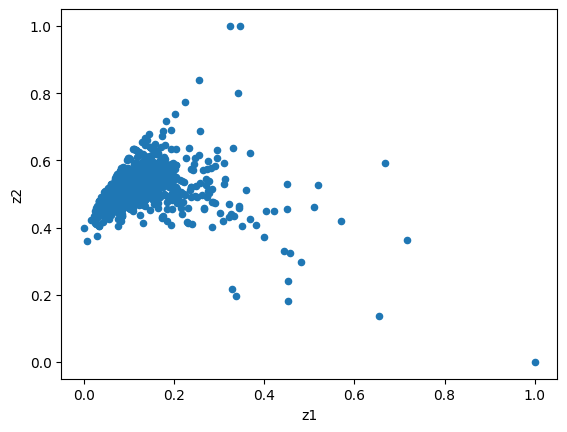

In [30]:
pca = pd.DataFrame(pipe.transform(X),columns=['z1','z2'])
pca.plot.scatter(x='z1',y='z2')

In [ ]:
sc = MinMaxScaler()
sc.fit(X)

Xs = pd.DataFrame(sc.transform(df[features]),columns=features)



,height,weight,stat_hp
0,0.015075,0.006401,0.192913
1,0.005025,0.000800,0.208661
2,0.065327,0.150530,0.429134
3,0.030151,0.014103,0.342520
4,0.025126,0.011702,0.192913


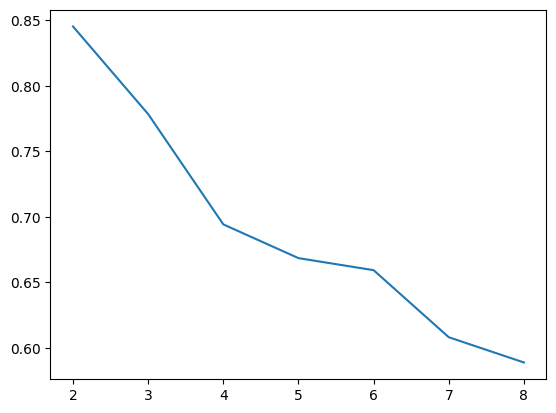

In [25]:
sil = []
for k in range(2,9):
    cl = KMeans(n_clusters=k)
    cl.fit(X)
    sil.append((k,silhouette_score(X, cl.predict(X))))
sil=pd.Series(dict(sil)).plot(kind='line')

In [ ]:
k = 4 
cl = KMeans(n_clusters=k)
cl.fit(X)

df['cluster'] = pca['cluster'] = pd.Series(cl.predict(X)).map(lambda x: f'cluster_{x:02d}')


,id,name,species_name,is_default,order,types,abilities,base_experience,height,weight,stat_hp,stat_hp_effort,stat_attack,stat_attack_effort,stat_defense,stat_defense_effort,stat_special-attack,stat_special-attack_effort,stat_special-defense,stat_special-defense_effort,stat_speed,stat_speed_effort,move_count,moves,game_index_count,game_versions,sprite_front_default,sprite_back_default,sprite_front_shiny,sprite_back_shiny,cluster
0,220,swinub,swinub,True,318,"ice,ground","oblivious,snow-cloak,thick-fat (hidden)",50,4,65,50,0,50,1,40,0,30,0,30,0,50,0,78,"headbutt,tackle,body-slam,take-down,double-edg...",17,"gold,silver,crystal,ruby,sapphire,emerald,fire...",https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,cluster_03
1,670,floette,floette,True,802,fairy,"flower-veil,symbiosis (hidden)",130,2,9,54,0,45,0,47,0,75,0,98,2,52,0,68,"vine-whip,tackle,razor-leaf,solar-beam,petal-d...",0,,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,cluster_03
2,365,walrein,walrein,True,486,"ice,water","thick-fat,ice-body,oblivious (hidden)",239,14,1506,110,3,80,0,90,0,95,0,90,0,65,0,73,"swords-dance,headbutt,body-slam,double-edge,gr...",14,"ruby,sapphire,emerald,firered,leafgreen,diamon...",https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,cluster_00
3,735,gumshoos,gumshoos,True,881,normal,"stakeout,strong-jaw,adaptability (hidden)",146,7,142,88,0,110,2,60,0,55,0,60,0,45,0,80,"fire-punch,ice-punch,thunder-punch,sand-attack...",0,,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,cluster_03
4,559,scraggy,scraggy,True,680,"dark,fighting","shed-skin,moxie,intimidate (hidden)",70,6,118,50,0,75,1,70,0,35,0,70,0,48,0,101,"mega-punch,fire-punch,ice-punch,thunder-punch,...",4,"black,white,black-2,white-2",https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,cluster_03


<Axes: xlabel='z1', ylabel='z2'>

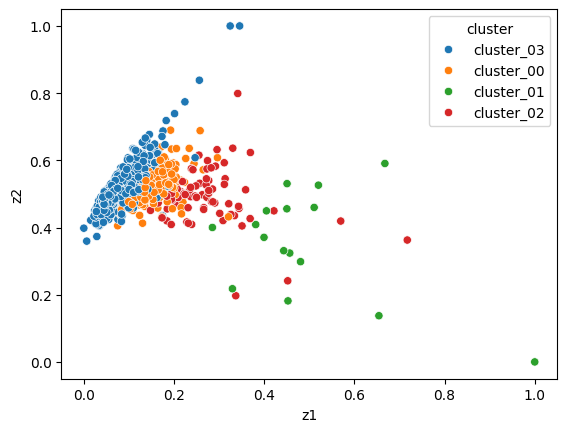

In [32]:
import seaborn as sns

# Ensure 'cluster' column exists in pca DataFrame
if 'cluster' not in pca.columns:
    pca['cluster'] = df['cluster']

sns.scatterplot(data=pca, x='z1', y='z2', hue='cluster', palette='tab10')


In [39]:
df[['id','cluster']].to_csv('pokemon_clusters.csv',index=False)

In [48]:
perfil = pd.concat([df[features+['cluster']].groupby('cluster').mean(),
df[features].mean().to_frame('total').T])

In [50]:
perfil.to_clipboard()